In [163]:
import math # 자주 사용되니, 미리 불러와주기.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# 1. 데이터 보기.

In [164]:
df=pd.read_csv("./../data/Starwars.csv")
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


* name : 이름
* height : 키
* mass : 몸무게
* hair_color : 머리 색상
* skin_color : 피부 색상
* eye_color : 눈 색깔
* birth_year : 태어난 연도
* sex : (생물학적) 성별
* gender : (사회적) 성별
* homeworld : 국적 
* species : 종

[tip] 범주형 변수와 연속형 변수를 분리해두면 분석하기 수월하다.
* 범주형 변수 : name, hair_color, skin_color, eye_color, sex, gender, homeworld, species
* 연속형 변수 : height, mass, birth_year

In [165]:
df.info() # 범주형인지 연속형인지 파악할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [166]:
df.describe() # 연속형 변수에 대한 수치 계산 보여주기.

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [167]:
df.describe(include="object") # 범주형 변수에 대한 수치 계산 보여주기.

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [168]:
print("hair_color : ", df["hair_color"].unique())
print("skin_color : ", df["skin_color"].unique())
print("eye_color : ", df["eye_color"].unique())
print("sex : ", df["sex"].unique())
print("gender : ", df["gender"].unique())
print("homeworld : ", df["homeworld"].unique())
print("species : ", df["species"].unique())
# 범주가 적으면, 범주 별로 그래프를 그리기 쉬워진다.

hair_color :  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
skin_color :  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
eye_color :  ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
sex :  ['male' 'none' 'female' 'hermaphroditic' nan]
gender :  ['masculine' 'feminine' nan]
homeworld :  ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'M

In [169]:
df.isnull().sum().sum()

105

In [170]:
df.shape[0]*df.shape[1]

957

In [171]:
105/957

0.109717868338558

In [172]:
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1]) # 괄호를 잘 이용해주기.

0.109717868338558

In [173]:
print("총 데이터의 개수 : ", df.shape[0]*df.shape[1])
# f-string <문자열 포맷팅>
print(f"총 결측치의 개수 : {df.isnull().sum().sum()} = 전체 데이터의 {(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100:.2f}%") # 소수점 아래 두 번째 까지 표기하기.
print("스타워즈에 나오는 주인공의 수 : ", df["name"].nunique()) # 동명이인이 존재하지 않음을 알 수 있다.
print("스타워즈에 나오는 종의 수 : ", df["species"].nunique())

총 데이터의 개수 :  957
총 결측치의 개수 : 105 = 전체 데이터의 10.97%
스타워즈에 나오는 주인공의 수 :  87
스타워즈에 나오는 종의 수 :  37


# 2. 데이터를 보고 질문하기.

## 강사의 질문
* 스타워즈 캐릭터의 성별 비율?
* 성별에 따른 캐릭터 신장의 분포?
* 가장 무거운 캐릭터와 가장 가벼운 캐릭터 
* 스타워즈 캐릭터의 키와 몸무게는 상관 관계를 가질까?

## 나의 질문
* 스타워즈 캐릭터의 피부 색깔과 머리 색깔이 상관 관계를 가질까?
* 스타워즈 캐릭터의 고향의 분포?
* 스타워즈 캐릭터의 종과 눈 색깔은 상관 관계를 가질까?
* gender에 따른 종의 분포?

# 3. 데이터 정비하기.

## 3-1. 결측치 처리하기.

In [174]:
df.isnull().sum() # 몇 개의 np.nan이 들어 있는지 알 수 있다.

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [175]:
df.isnull().any(axis=0) # 하나라도 True이면 True를 반환해준다. (하나라도 np.nan 값이 있으면 True라고 반환해준다.)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [176]:
df_copy=df.copy()
df_copy.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [177]:
print(df.isnull().sum().sum())
print(df_copy.isnull().sum().sum())

105
105


[tip] 고유한 특성은 그대로 내버려두도록 하기. 그리고 몸무게나 키는 그냥 0으로 처리해주기.

In [178]:
df_copy["height"].fillna(0, inplace=True)
df_copy["mass"].fillna(0, inplace=True)

In [179]:
df_copy.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [180]:
print(df_copy.loc[df_copy["sex"]=="none"])
print(df_copy.loc[df_copy["sex"].isnull()]) # sex가 np.nan인 값을 보여주기.

      name  height   mass hair_color   skin_color  eye_color  birth_year  \
1    C-3PO   167.0   75.0        NaN         gold     yellow       112.0   
2    R2-D2    96.0   32.0        NaN  white, blue        red        33.0   
7    R5-D4    97.0   32.0        NaN   white, red        red         NaN   
21   IG-88   200.0  140.0       none        metal        red        15.0   
72  R4-P17    96.0    0.0       none  silver, red  red, blue         NaN   
84     BB8     0.0    0.0       none         none      black         NaN   

     sex     gender homeworld species  
1   none  masculine  Tatooine   Droid  
2   none  masculine     Naboo   Droid  
7   none  masculine  Tatooine   Droid  
21  none  masculine       NaN   Droid  
72  none   feminine       NaN   Droid  
84  none  masculine       NaN   Droid  
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Oli?   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0 

In [181]:
 # sex가 none인 값은 robot으로 넣어주기.
df_copy.loc[df_copy["sex"]=="none", "sex"]="robot"
print("Sex : ", df_copy["sex"].unique())

Sex :  ['male' 'robot' 'female' 'hermaphroditic' nan]


In [182]:
df_copy.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

# 4. EDA & Visualization

## 4-1. 스타워즈 캐릭터의 성별 비율

In [183]:
df_copy["gender"].value_counts() # gender 성비를 알기 위함이다.

masculine    66
feminine     17
Name: gender, dtype: int64

In [184]:
masculine_num=df_copy.loc[df_copy["gender"]=="masculine", "gender"].count()
feminine_num=df_copy.loc[df_copy["gender"]=="feminine", "gender"].count()
robot_num=df_copy.loc[df_copy["gender"]=="robot", "gender"].count()

In [185]:
gender_num=df_copy["gender"].count()

In [186]:
df_copy.loc[df_copy["gender"]=="masculine", "gender"].count()
print(f"masculine은 전체 gender의 {(masculine_num)/(gender_num)*100:.2f}%이다.")
print(f"feminine은 전체 gender의 {(feminine_num)/(gender_num)*100:.2f}%이다.")
print(f"robot은 전체 gender의 {(robot_num)/(gender_num)*100:.2f}%이다.")

masculine은 전체 gender의 79.52%이다.
feminine은 전체 gender의 20.48%이다.
robot은 전체 gender의 0.00%이다.


In [187]:
df_copy["sex"].value_counts()

male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

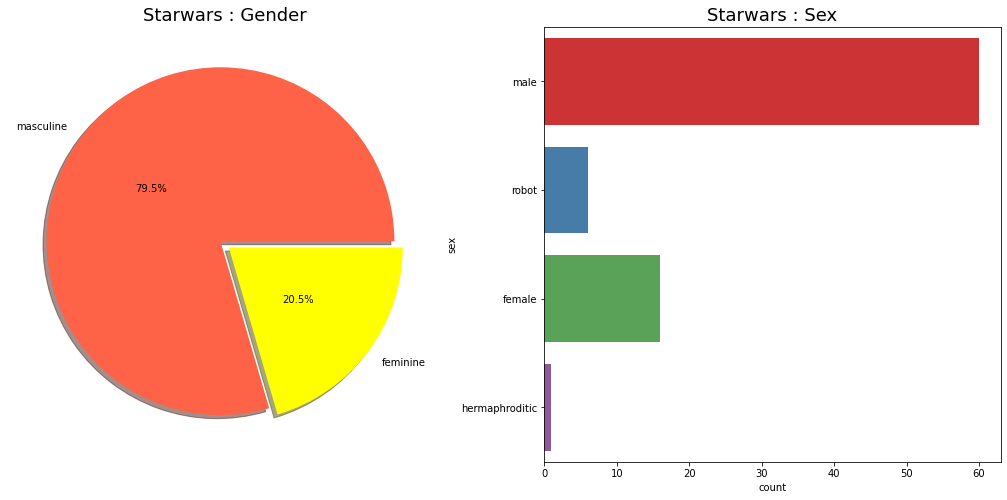

In [189]:
fig, ax=plt.subplots(1, 2, figsize=(18,8))
explode=[0.03, 0.03]
color_list=["tomato", "yellow"]

_=df_copy["gender"].value_counts().plot.pie(ax=ax[0], autopct="%.1f%%", colors=color_list, shadow=True, 
                                            explode=explode, pctdistance=0.5) # % 표기하기 위해서는 2번 적어줘야 한다.
_=ax[0].set_title("Starwars : Gender", size=18)
_=ax[0].set_ylabel("") # ylabel 없애주기.

_=sns.countplot(data=df_copy, y="sex", ax=ax[1], palette="Set1")
_=ax[1].set_title("Starwars : Sex", size=18)

plt.show()
fig.savefig(".././images/gender&sex.png", dpi=200, facecolor='#FDFDFE') # 흰색 배경

## 4-2. 스타워즈 캐릭터의 성별에 따른 신장 분포

In [192]:
df_copy["height"].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [197]:
# 왜도와 첨도 구하기.
print("왜도 : ", df_copy["height"].skew()) # 얼마나 한 쪽으로 치우쳐져 있는지
print("첨도 : ", df_copy["height"].kurt()) # 얼마나 평균 근처에 모여 있는지

왜도 :  -1.7608777087884935
첨도 :  2.927696525163497


In [201]:
df_copy.loc[df_copy["sex"]=="hermaphroditic"] # 자웅동체 캐릭터
# 분포를 그릴 때에는 이 데이터는 제거하고 실행하도록 하기.

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


In [206]:
df_copy.loc[df_copy["sex"]=="male", "height"]

0     172.0
3     202.0
5     178.0
8     183.0
9     182.0
10    188.0
11    180.0
12    228.0
13    180.0
14    173.0
16    170.0
17    180.0
18     66.0
19    170.0
20    183.0
22    190.0
23    177.0
24    175.0
25    180.0
27      0.0
28     88.0
29    160.0
30    193.0
31    191.0
32    170.0
33    196.0
34    224.0
35    206.0
37    137.0
38    112.0
41    175.0
42    180.0
44     94.0
45    122.0
46    163.0
47    188.0
48    198.0
49    196.0
50    171.0
52    188.0
53    264.0
54    188.0
55    196.0
56    185.0
58    183.0
59    183.0
63    193.0
64    191.0
65    183.0
67    198.0
68    229.0
71     79.0
73    193.0
74    191.0
76    216.0
77    234.0
78    188.0
80    206.0
81      0.0
83      0.0
Name: height, dtype: float64

In [214]:
df_copy["sex"].unique()

array(['male', 'robot', 'female', 'hermaphroditic', nan], dtype=object)

In [227]:
df_copy["gender"].unique()

array(['masculine', 'feminine', nan], dtype=object)

In [244]:
import os
print(os.name)

nt


In [259]:
if os.name == "nt":
    plt.rc("font", family="Malgun Gothic") # 맑은 고딕 가져오기.
    plt.rc("legend", fontsize=13) # 범례 fontsize 조정하기.

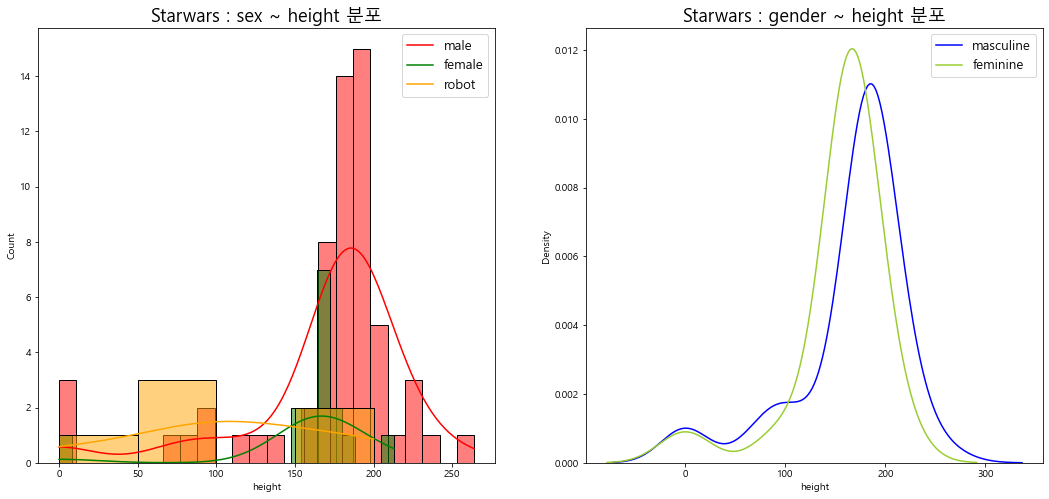

In [261]:
fig ,ax = plt.subplots(1, 2, figsize=(18,8))

_=sns.histplot(x=df_copy.loc[df_copy["sex"]=="male", "height"], ax=ax[0], color="red", kde=True)
_=sns.histplot(x=df_copy.loc[df_copy["sex"]=="female", "height"], ax=ax[0], color="green", kde=True)
_=sns.histplot(x=df_copy.loc[df_copy["sex"]=="robot", "height"], ax=ax[0], color="orange", kde=True)
_=ax[0].legend(["male", "female", "robot"])

_=sns.kdeplot(x=df_copy.loc[df_copy["gender"]=="masculine", "height"], ax=ax[1], color="blue")
_=sns.kdeplot(x=df_copy.loc[df_copy["gender"]=='feminine', "height"], ax=ax[1], color="yellowgreen")
_=ax[1].legend(["masculine", 'feminine'])

_=ax[0].set_title("Starwars : sex ~ height 분포", size=18)
_=ax[1].set_title("Starwars : gender ~ height 분포", size=18)

plt.show()
fig.savefig(".././images/starwars 성별~키 분포.png", dpi=200, facecolor='#FDFDFE') # 흰색 배경

# 남성 캐릭터가 여성 캐릭터보다 더 키가 큰 쪽으로 분포 되어있다.
# 로봇은 남성, 여성보다는 키가 더 작은 쪽에 분포되어 있다. (물론 키가 같은 경우도 존재한다.)

## 4-3. 가장 가벼운 캐릭터와 가장 무거운 캐릭터